# Project : Credit Card applications Prediction

Any major banks evolves and grows around it's customers . In today's world a credit card is more of a man/women's saviour in hard times or a friend in celebrations . A certain portion of bank's revenue generated from credit card sales and usage but giving it to a good customer is also very important . If the card goes into wrong hands then the bank has to pay it's price .
So giving the credit card to a potential good customer is always a top priority .

Manually it is impossible for any financial institution to predict the good customers or right applications . At this point Machine Learning and Data science comes into picture . With ML and EDA we can find minute details of any underlying information or patterns and also predict the best applicants or applications .

If we can make a good model which is stable and has a higher accuracy then it can surely make the credit card approval or rejection process much smoother and robust .

In this project i have done all the required EDA steps which are data manipulations , data cleaning , data visualization , imputations etc to get certain aspects like Work experience plays a huge roll for approval of the credit cards .

I have used supervised and unsupervised Ml algorithms and achieved an accuracy of 94.62 % . I have used multiple algos and different algorithms serves different purpose which are described in details at the end . This project can really play a crucial part in banking or financial institutions and i hope i had done some justice .

In [ ]:
import numpy as np  ## Importing numpy library for data analysis .
import pandas as pd  ## Importing Pandas library for data analysis .
import matplotlib.pyplot as plt ## Importing matplotlib library for data visualization .
import seaborn as sns  ## Importing seaborn library for data visualization .
import plotly.express as px ## Importing plotly express for advance data visualization .

In [ ]:
credit_new=pd.read_csv("/content/Credit_card.csv")
credit_new.head() ## head function will show us the top 5 rows .

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
credit_label=pd.read_csv("/content/Credit_card_label.csv")
credit_label.head() ## head function will show us the top 5 rows .

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
credit=pd.merge(left=credit_new,right=credit_label,on='Ind_ID') ## Merging two datasets into one using pd.merge function on common column Ind_ID .
credit.head() ## head function will show us the top 5 rows .

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
credit.shape ## Using shape function to see total no of rows and total no of columns .

(1548, 19)

In [ ]:
credit.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
credit.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
credit=credit.drop_duplicates() ## Using drop_duplicates function to delete all the duplicate rows .

In [ ]:
credit.columns ## columns function will show the name of all columns .

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
## Renaming some colums to make it more readable , concise and easy to understand .
credit=credit.rename(columns={'Ind_ID':'ID','label':'Label','GENDER':'Gender','Car_Owner':'Car_owner','Propert_Owner':'Property','CHILDREN':'Children',
                      'Annual_income':'Income','Type_Income':'Income_type','EDUCATION':'Education','Housing_type':'Housing','Birthday_count':'Age',
                      'Employed_days':'Employed_months','Mobile_phone':'Mobile','Work_Phone':'Work_phone','EMAIL_ID':'Email_id',
                      'Type_Occupation':'Occupation','Family_Members':'Family_members'})

In [ ]:
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Occupation,Family_members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
credit.describe().T ## Use describe function to see all numeric columns mean , median , max , min , standard deviation , q1 and q3 .

,count,mean,std,min,25%,50%,75%,max
ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
Children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
Age,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
Employed_months,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
Email_id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


'Age' and 'Employed_months' column is calculated day wise and it is in negative . I have changed both the columns .

I have changed 'Age' column by dividing the column with 365 and make the values positive with abs function .

I have changed 'Employed_months' column by dividing the column with 30 and make the values positive with abs function .

In [ ]:
credit['Age']=round(credit['Age'].abs()/365,0)
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Occupation,Family_members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1


In [ ]:
credit['Employed_months']=round(credit['Employed_months'].abs()/30,0)
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Occupation,Family_members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,12175.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,20.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,NaN,2,1


In [ ]:
## Percentage of null values in each column with isnull().sum() function .
for i in credit.columns :
  print(f"Percentage of null values of {i} :\n" ,(credit[i].isnull().sum()*100)/len(credit))

Percentage of null values of ID :
 0.0
Percentage of null values of Gender :
 0.45219638242894056
Percentage of null values of Car_owner :
 0.0
Percentage of null values of Property :
 0.0
Percentage of null values of Children :
 0.0
Percentage of null values of Income :
 1.4857881136950903
Percentage of null values of Income_type :
 0.0
Percentage of null values of Education :
 0.0
Percentage of null values of Marital_status :
 0.0
Percentage of null values of Housing :
 0.0
Percentage of null values of Age :
 1.421188630490956
Percentage of null values of Employed_months :
 0.0
Percentage of null values of Mobile :
 0.0
Percentage of null values of Work_phone :
 0.0
Percentage of null values of Phone :
 0.0
Percentage of null values of Email_id :
 0.0
Percentage of null values of Occupation :
 31.524547803617573
Percentage of null values of Family_members :
 0.0
Percentage of null values of Label :
 0.0


Our dataset is really small and 'Occupation' column has 31.52% null values . So that is why i have decided to drop this column .

In [ ]:
credit=credit.drop(['Occupation'],axis=1)
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Family_members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,12175.0,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,20.0,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1


Making two different datasets for int columns and categorical columns .

In [ ]:
cat_columns=credit.drop(['ID','Income','Age','Employed_months'],axis=1) ## Creating a dataframe for categorical columns .
num_columns=credit[['Income','Age','Employed_months']]  ## Creating a dataframe for numeric columns .

Creating a for loop which will show total count of each distinct values by using seaborn countplot . Here we will also see every columns value_counts and total percentage of each each distinct values that is present in that column .

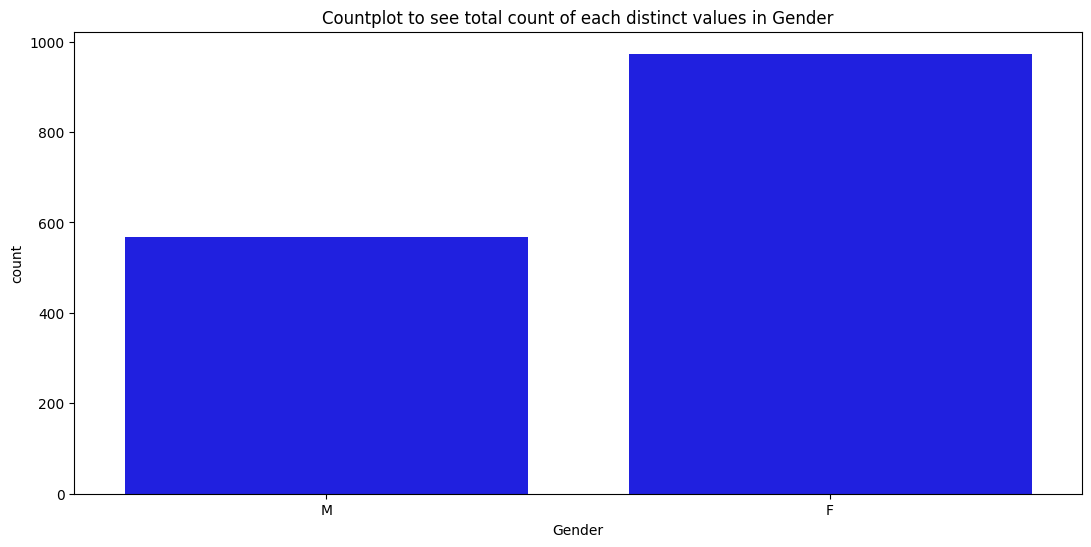

--------------------------------------------
Percentage of each distinct values in Gender :
 Gender
F    62.855297
M    36.692506
Name: count, dtype: float64


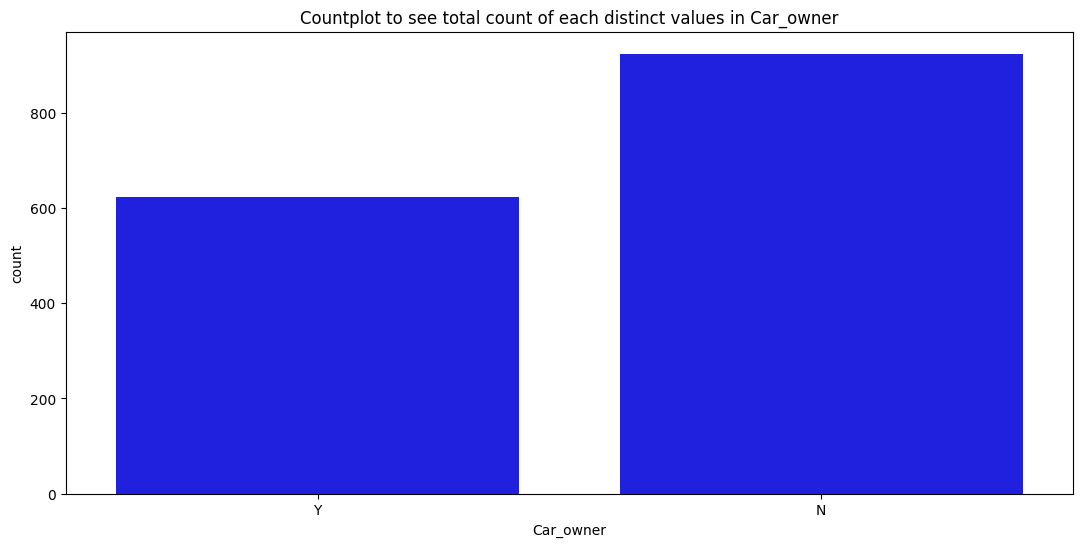

--------------------------------------------
Percentage of each distinct values in Car_owner :
 Car_owner
N    59.689922
Y    40.310078
Name: count, dtype: float64


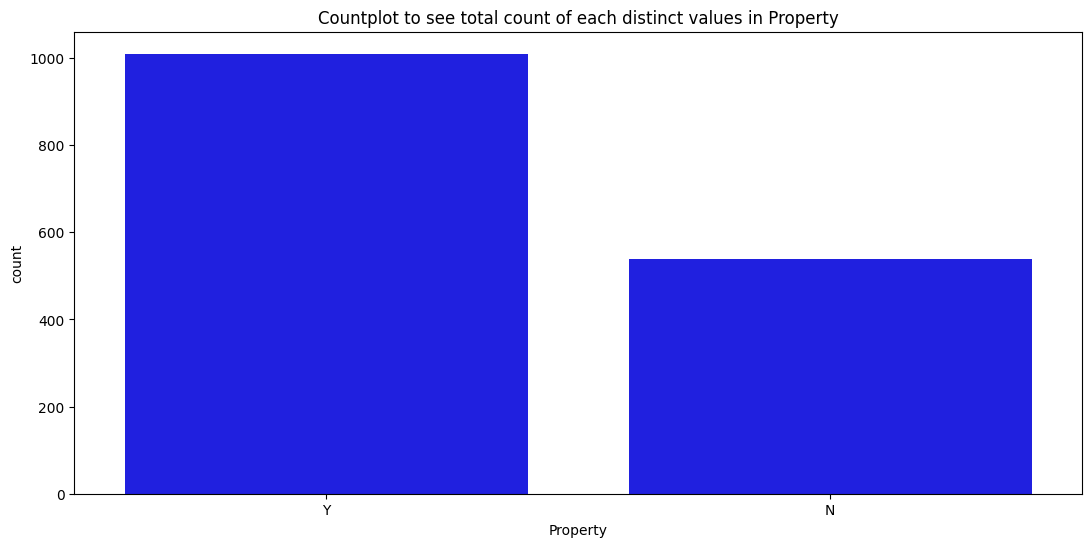

--------------------------------------------
Percentage of each distinct values in Property :
 Property
Y    65.245478
N    34.754522
Name: count, dtype: float64


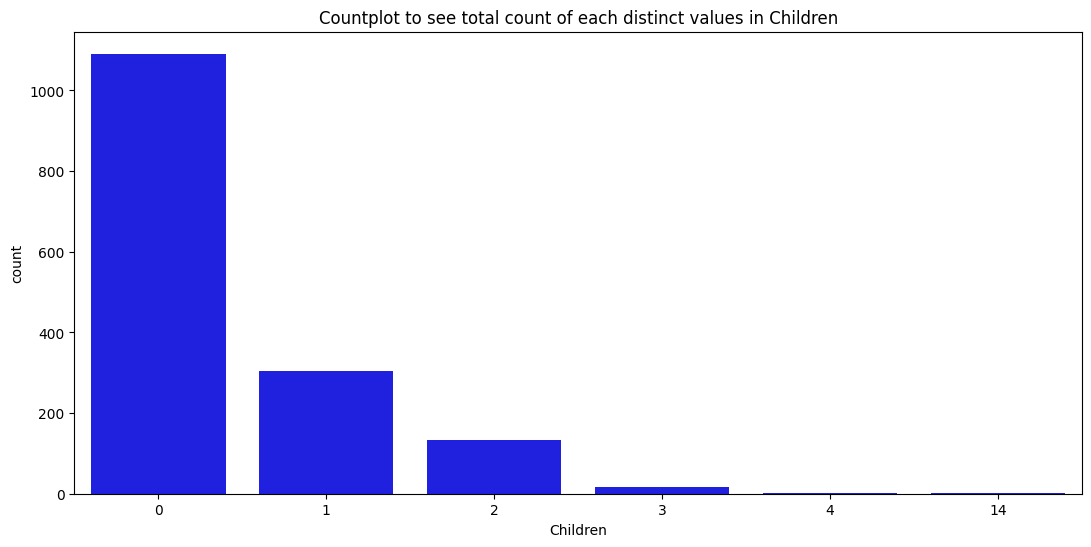

--------------------------------------------
Percentage of each distinct values in Children :
 Children
0     70.478036
1     19.702842
2      8.656331
3      1.033592
4      0.064599
14     0.064599
Name: count, dtype: float64


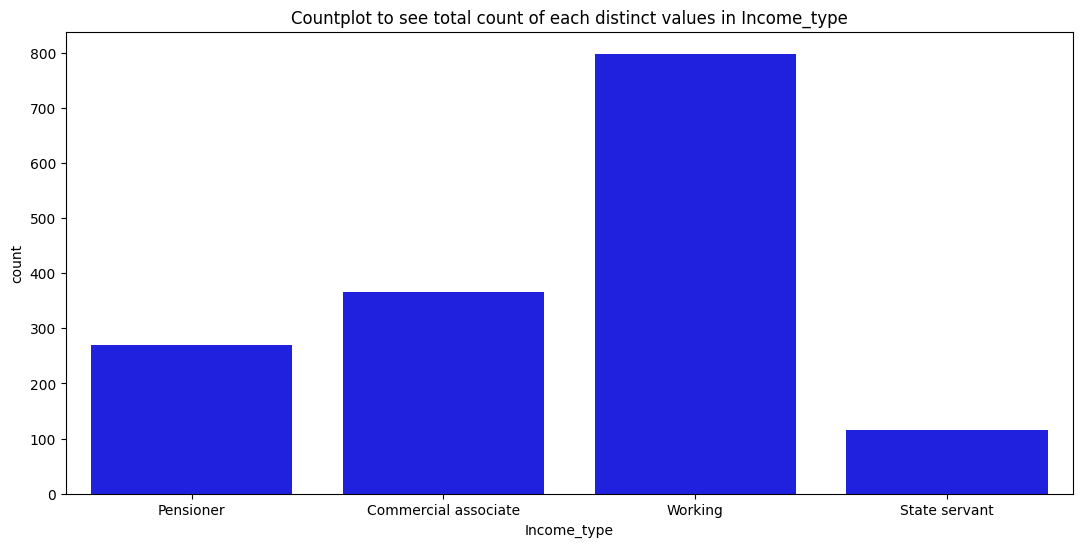

--------------------------------------------
Percentage of each distinct values in Income_type :
 Income_type
Working                 51.550388
Commercial associate    23.578811
Pensioner               17.377261
State servant            7.493540
Name: count, dtype: float64


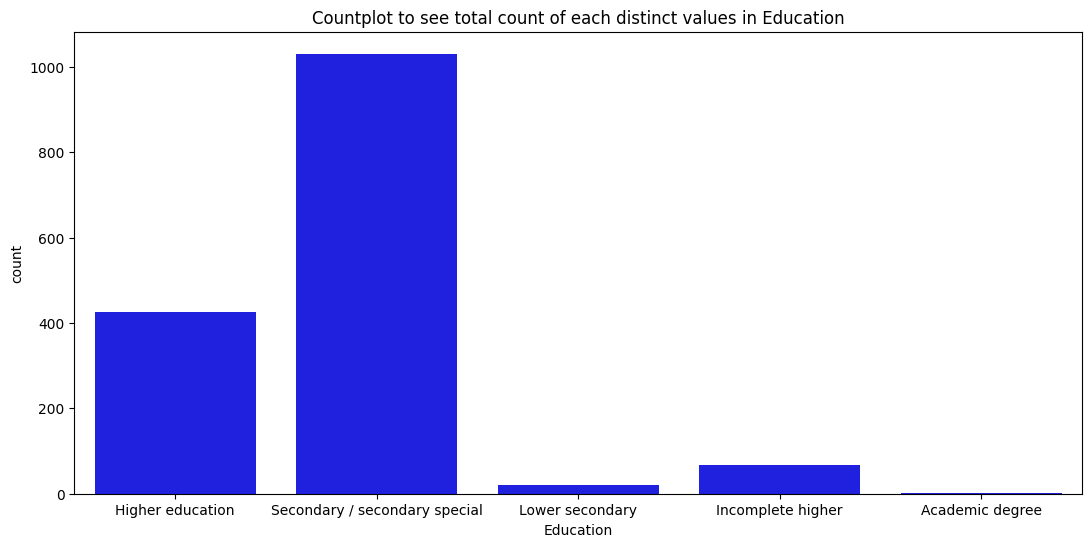

--------------------------------------------
Percentage of each distinct values in Education :
 Education
Secondary / secondary special    66.602067
Higher education                 27.519380
Incomplete higher                 4.392765
Lower secondary                   1.356589
Academic degree                   0.129199
Name: count, dtype: float64


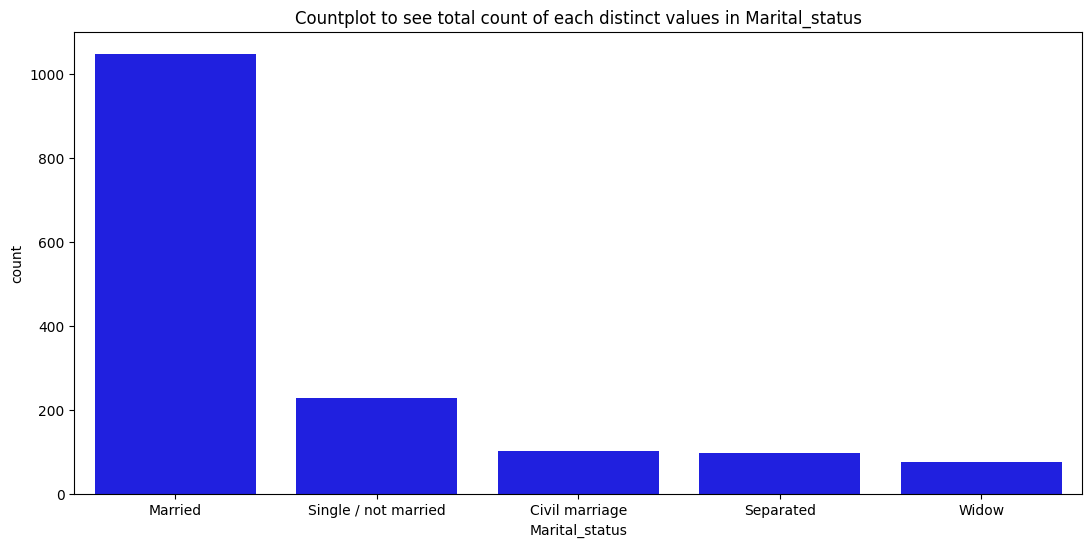

--------------------------------------------
Percentage of each distinct values in Marital_status :
 Marital_status
Married                 67.764858
Single / not married    14.664083
Civil marriage           6.524548
Separated                6.201550
Widow                    4.844961
Name: count, dtype: float64


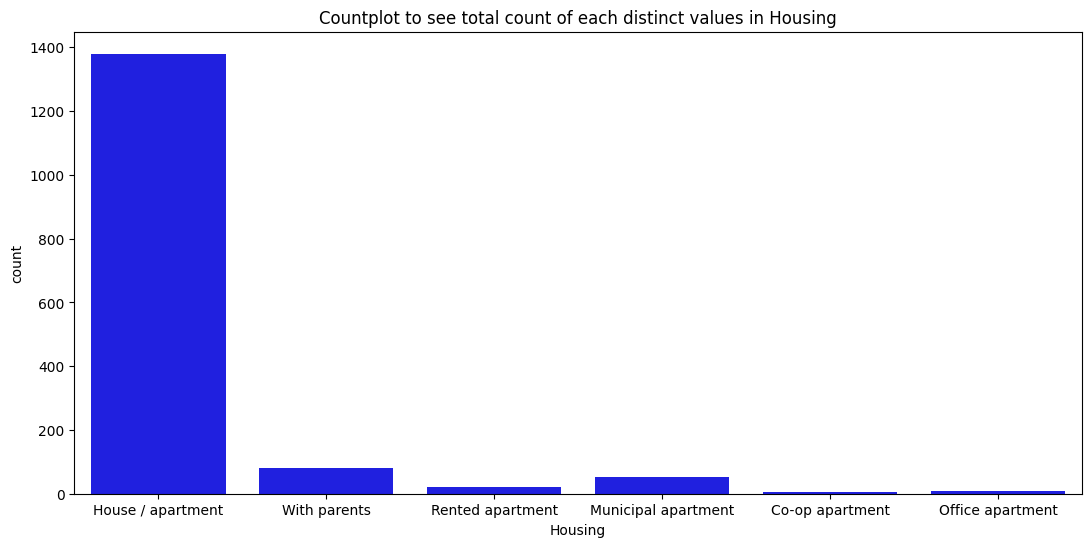

--------------------------------------------
Percentage of each distinct values in Housing :
 Housing
House / apartment      89.147287
With parents            5.167959
Municipal apartment     3.423773
Rented apartment        1.356589
Office apartment        0.581395
Co-op apartment         0.322997
Name: count, dtype: float64


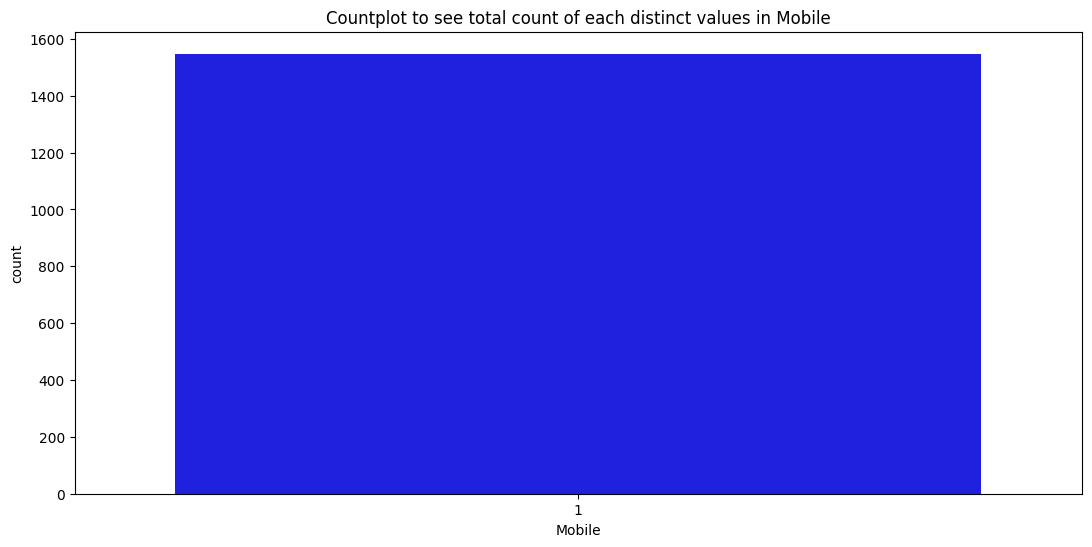

--------------------------------------------
Percentage of each distinct values in Mobile :
 Mobile
1    100.0
Name: count, dtype: float64


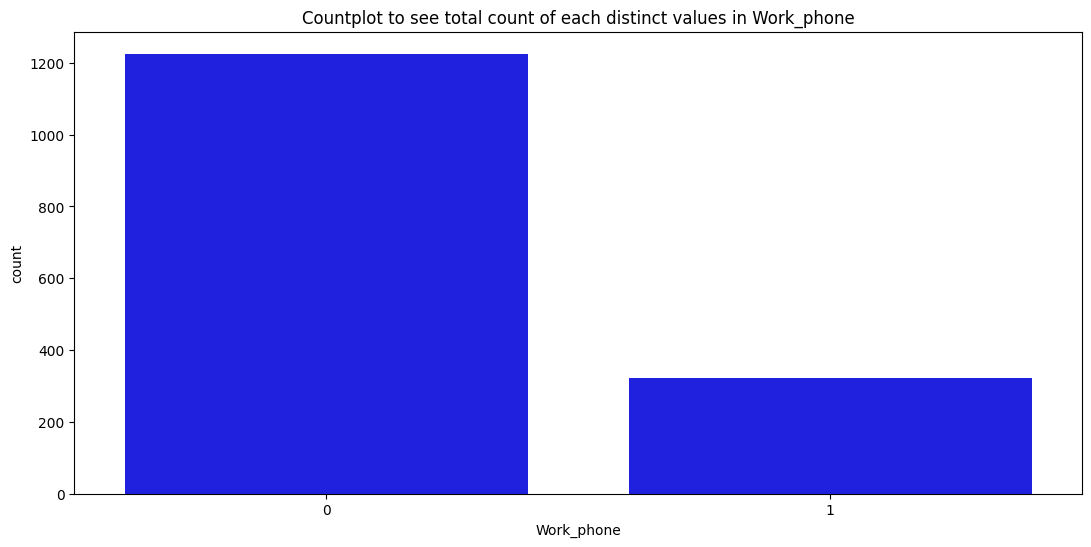

--------------------------------------------
Percentage of each distinct values in Work_phone :
 Work_phone
0    79.198966
1    20.801034
Name: count, dtype: float64


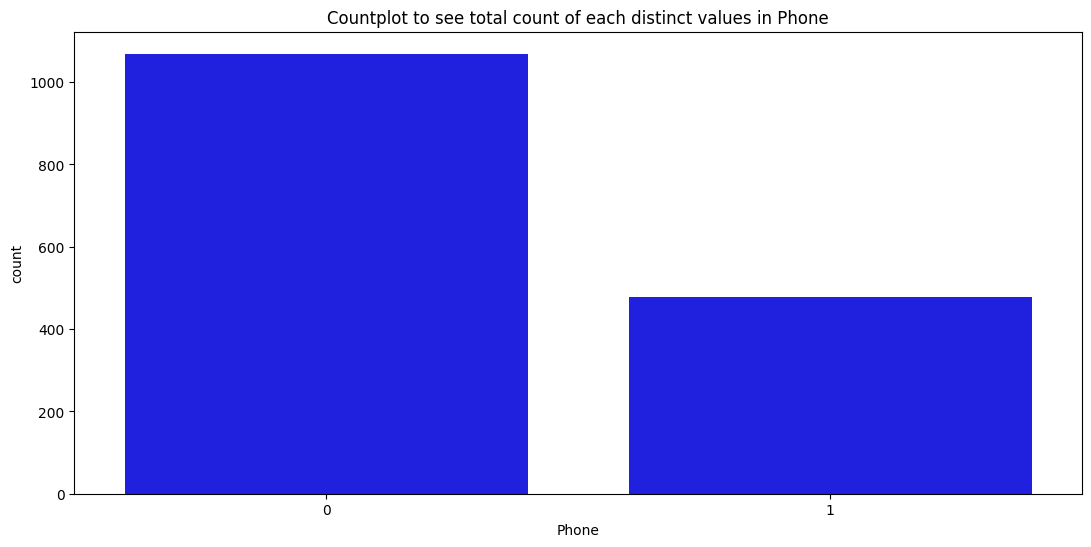

--------------------------------------------
Percentage of each distinct values in Phone :
 Phone
0    69.056848
1    30.943152
Name: count, dtype: float64


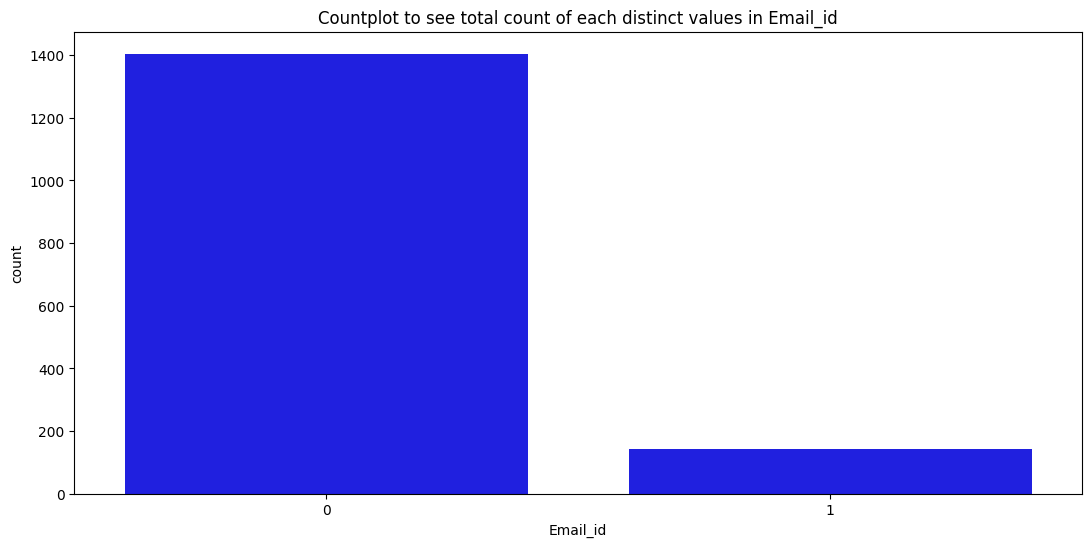

--------------------------------------------
Percentage of each distinct values in Email_id :
 Email_id
0    90.762274
1     9.237726
Name: count, dtype: float64


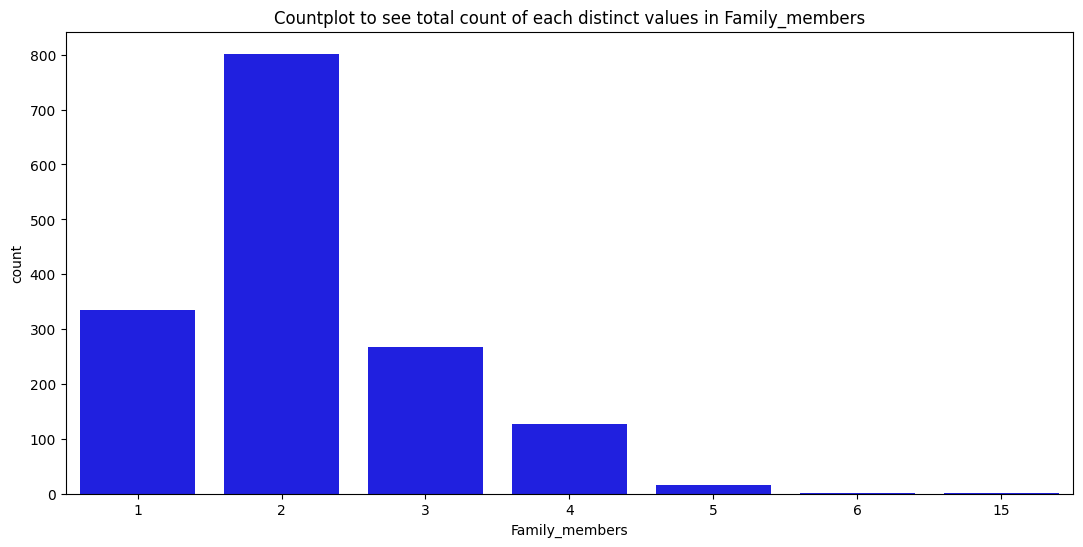

--------------------------------------------
Percentage of each distinct values in Family_members :
 Family_members
2     51.808786
1     21.576227
3     17.312661
4      8.204134
5      0.968992
6      0.064599
15     0.064599
Name: count, dtype: float64


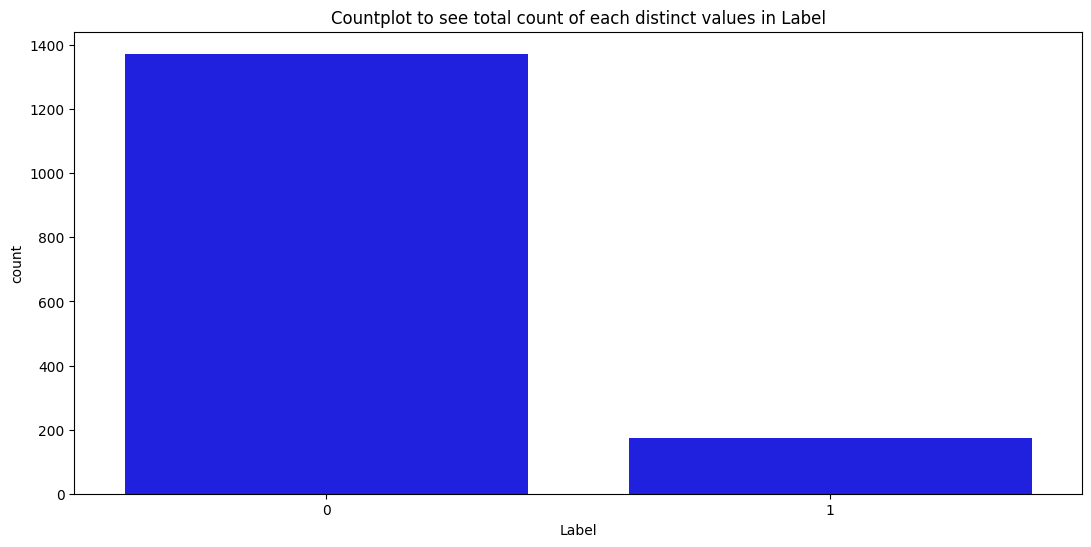

--------------------------------------------
Percentage of each distinct values in Label :
 Label
0    88.69509
1    11.30491
Name: count, dtype: float64


In [ ]:
for i in cat_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(13,6))  ## Selecting the size of each plot .
  sns.countplot(data=cat_columns,x=i,color='blue')
  plt.title(f"Countplot to see total count of each distinct values in {i}")
  plt.show() ## Show will show all the visuals .
  print("--------------------------------------------")
  print(f"Percentage of each distinct values in {i} :\n" , (cat_columns[i].value_counts()*100)/len(cat_columns[i]))

**Data Analysis aspect :**             

1. Label or Target : 175 people's application has been rejected . 1 means rejection and 0 means approval . Rejection percentage is 11.30% .

2. Gender : More females are there than men . 62.85% applicants are female .

3. Car_owner : Most people do not have cars . Only 40.31% people has cars .

4. Property : 65.24% people posseses property .

5. Children : Most of the person have 0 children and 1 children and very very few has 14 children . 70.47% people has 1 children and 19.70% has 2 children .

6. Income Type : State servant is the lowest with 7.49% and Working professional is highest with 51.55% .

7. Education : 66.60% applicants has educational qualification of secondary and only 0.12 % people has  Academic degree .

8. Marital_status : Most of the applicants are married and very few are widow or separeted . 67.76% are married and only 11% people are either widow or separated .

9. Housing : 89.14% applicants lives in House or apartment .

10. Mobile : All the applicants has mobile .

11. Work Phone : 79.19% People does not have any work phone .

12. Phone : 30.94% applicants has phone .

13. Email : 9.23% People have email id out of all applicants .

14. Family members : 51.80% applicants has 2 family members followed by 1 , 3, and 4 .

In [ ]:
y_n_columns=['Gender','Car_owner','Property'] ## Creating a list of columns which has binary values .

In [ ]:
## Using np.where function to convert values into 0 and 1 .
credit['Gender']=np.where(credit['Gender']=='F',1,0) ## Converting female into 1 and male into 0 .
credit['Car_owner']=np.where(credit['Car_owner']=='Y',1,0) ## Converting 'Y' into 1 and 'N'=0 .
credit['Property']=np.where(credit['Property']=='Y',1,0) ## Converting 'Y' into 1 and 'N'=0 .

In [ ]:
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Family_members,Label
0,5008827,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,12175.0,1,0,0,0,2,1
1,5009744,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
2,5009746,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,20.0,1,1,1,0,2,1
3,5009749,1,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
4,5009752,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1


In [ ]:
num_columns=num_columns.dropna() ## Dropping all null values with dropna function .

Creating a for loop with histogram for all the numeric columns to see their distribution and also we can see each columns mean , median value .

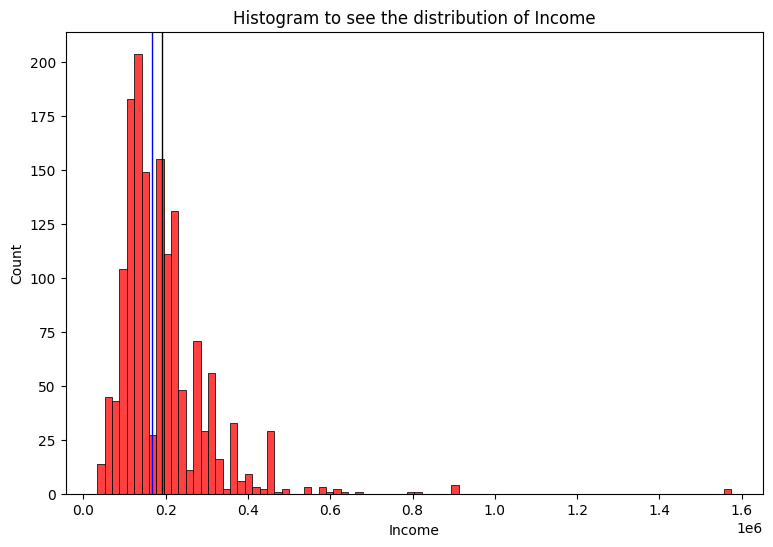

---------------------------------------
Mean value of Income : 191386.54191616765
Median value of Income : 166500.0


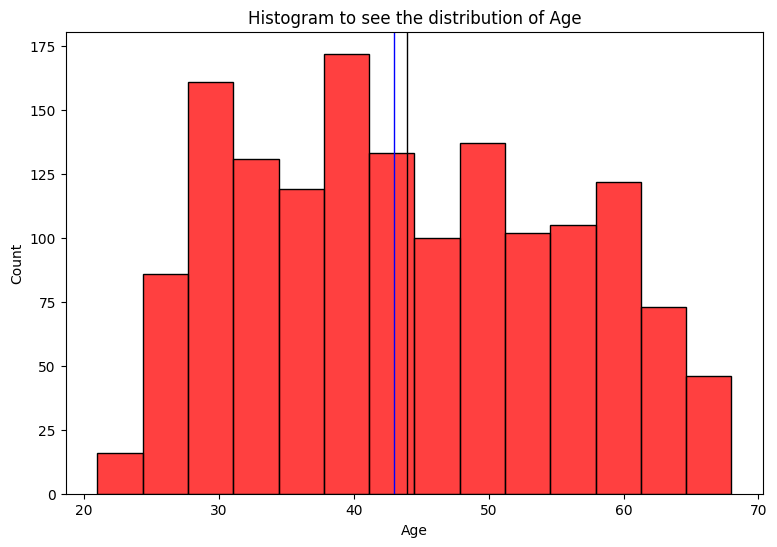

---------------------------------------
Mean value of Age : 43.921490352628076
Median value of Age : 43.0


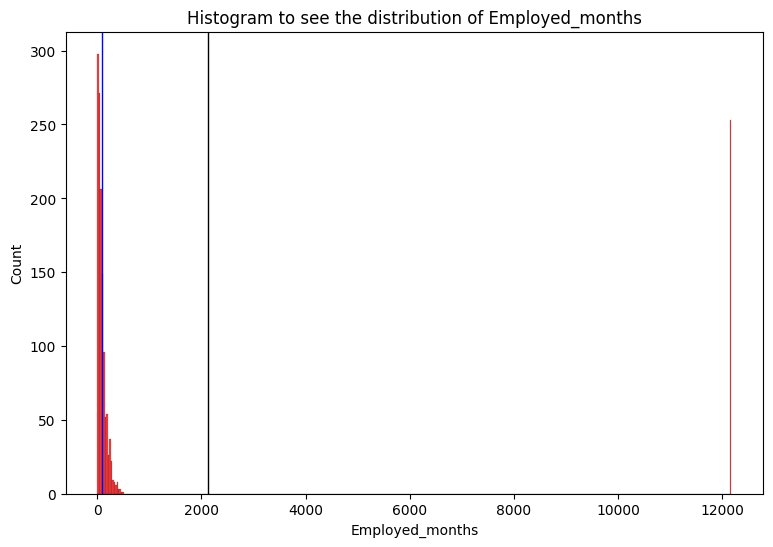

---------------------------------------
Mean value of Employed_months : 2123.83499667332
Median value of Employed_months : 83.0


In [ ]:
for i in num_columns.columns :  ## Creating the for loop .
  plt.figure(figsize=(9,6))  ## Selecting the size of each plot .
  sns.histplot(data=num_columns,x=i,color='red')
  plt.axvline(x=num_columns[i].mean(),linewidth=1,color='black') ## Creating a line for mean .
  plt.axvline(x=num_columns[i].median(),linewidth=1,color='blue') ## Creating a line for median .
  plt.title(f"Histogram to see the distribution of {i}")
  plt.show() ## show will show all the visuals .
  print("---------------------------------------")
  print(f"Mean value of {i} :", num_columns[i].mean())
  print(f"Median value of {i} :", num_columns[i].median())

We can clearly see that Income is moderately right skewed but Employed_months is very very right skewed with lots of outliers .

Creating a for loop with boxplot for all the columns to visualize the outliers in positive and negative side .

To get the outliers the equation is (q3+1.5*iqr) and (q1-1.5*iqr) . Any values above (q3+1.5*iqr) and any values less than (q1-1.5*iqr) can be considerd as an outlier .

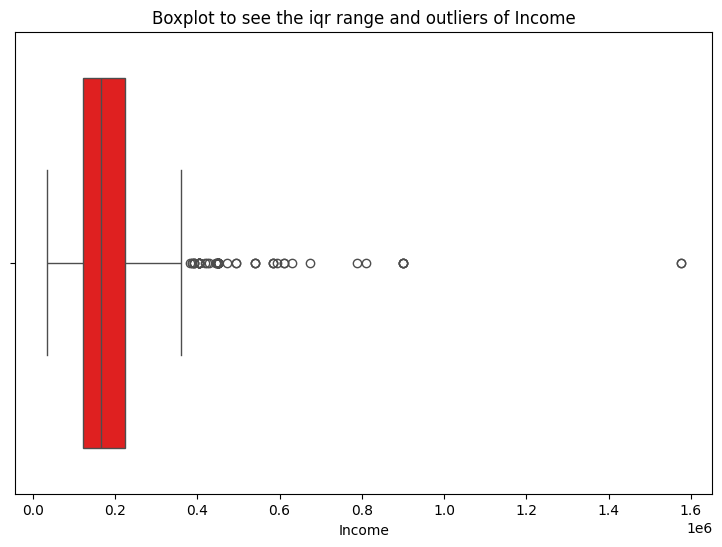

-------------------------------------
Value of outliers in positive side of Income : 380250.0
Maximum values in Income : 1575000.0
Minimum values in Income : 33750.0


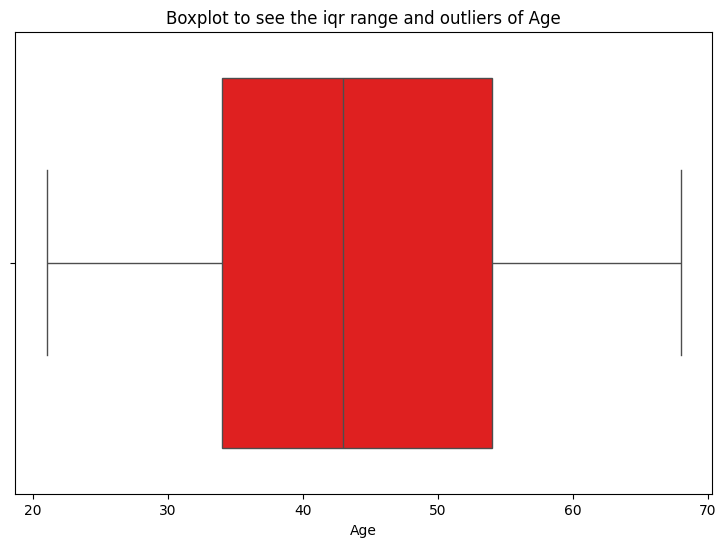

-------------------------------------
Value of outliers in positive side of Age : 84.0
Maximum values in Age : 68.0
Minimum values in Age : 21.0


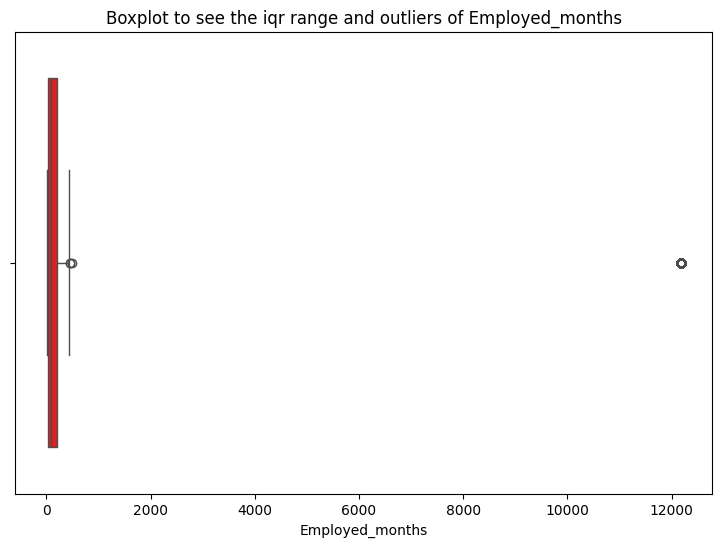

-------------------------------------
Value of outliers in positive side of Employed_months : 445.25
Maximum values in Employed_months : 12175.0
Minimum values in Employed_months : 2.0


In [ ]:
for i in num_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(9,6))  ## Selecting the size of each plot .
  sns.boxplot(data=num_columns,x=i,color='red')
  plt.title(f"Boxplot to see the iqr range and outliers of {i}")
  plt.show()  ## show will show all the visuals .
  print("-------------------------------------")
  print(f"Value of outliers in positive side of {i} :", np.percentile(num_columns[i],75,interpolation='midpoint')+1.5*(np.percentile(num_columns[i],75,interpolation='midpoint')
  -np.percentile(num_columns[i],25,interpolation='midpoint')))
  print(f"Maximum values in {i} :", num_columns[i].max())
  print(f"Minimum values in {i} :", num_columns[i].min())

Age does not have any outliers but Income has some outliers and Employed_months has some very very extreme outliers .

An employee cannot work for 12175 months . these values may be inserted wrongly or deliberately but i have to change all these values or drop it .

In [ ]:
credit.Employed_months[credit.Employed_months>=480]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .

<ipython-input-25-811b2005f2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.Employed_months[credit.Employed_months>=480]=np.nan


In [ ]:
young_age=credit[credit.Age<30] ## Using filter method to fetch the matching rows .
young_age.shape ## shape function will show total no of rows and columns .

(187, 18)

In [ ]:
print("Percentage of approval and rejection when age is less than 30 :\n", (young_age.Label.value_counts()*100)/len(young_age))

Percentage of approval and rejection when age is less than 30 :
 Label
0    88.770053
1    11.229947
Name: count, dtype: float64


In [ ]:
old_age=credit[credit.Age>=55] ## Using filter method to fetch the matching rows .
old_age.shape ## shape function will show total no of rows and columns .

(353, 18)

In [ ]:
print("Percentage of approval and rejection when age is more than 55 :\n", (old_age.Label.value_counts()*100)/len(old_age))

Percentage of approval and rejection when age is more than 55 :
 Label
0    87.535411
1    12.464589
Name: count, dtype: float64


In [ ]:
less_exp=credit[credit.Employed_months<=24] ## Using filter method to fetch the matching rows .
less_exp.shape ## shape function will show total no of rows and columns .

(257, 18)

In [ ]:
print("Percentage of approval and rejection when the person is employed for less than 24 months :\n", (less_exp.Label.value_counts()*100)/len(less_exp))

Percentage of approval and rejection when the person is employed for less than 24 months :
 Label
0    82.879377
1    17.120623
Name: count, dtype: float64


In [ ]:
high_exp=credit[credit.Employed_months>100] ## Using filter method to fetch the matching rows .
high_exp.shape ## shape function will show total no of rows and columns .

(410, 18)

In [ ]:
print("Percentage of approval and rejection when the person is employed for more than 100 months :\n", (high_exp.Label.value_counts()*100)/len(high_exp))

Percentage of approval and rejection when the person is employed for more than 100 months :
 Label
0    92.439024
1     7.560976
Name: count, dtype: float64


If a person works for less than 24 months then the rejection chances get upto 17.12% and if the applicant works for more than 100 months then their rejection chances drops to 7.56% .

Age doesn't have a very huge impact on approval or rejection .

In [ ]:
## Using boxplot to visualize min,max,q1,q2,q3 and outliers .
fig=px.box(credit,y='Income',width=650,height=750,
           title='Boxplot to see iqr,q1,q2,q3 and outliers')
fig.show()

Income more than 1 million makes this income column very very skewed thats why i have to make null values of those datapoints .

In [ ]:
credit.Income[credit.Income>1000000]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .

<ipython-input-35-a92107116e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.Income[credit.Income>1000000]=np.nan


In [ ]:
## Using boxplot to visualize min,max,q1,q2,q3 and outliers .
fig=px.box(credit,y='Income',width=650,height=650)
fig.show()

In [ ]:
low_income=credit[credit.Income<=100000] ## Using filter method to fetch the matching rows .
low_income.shape ## shape function will show total no of rows and columns .

(192, 18)

In [ ]:
print("Percentage of approval and rejection when the income is lower than 100k :", (low_income.Label.value_counts()*100)/len(low_income))

Percentage of approval and rejection when the income is lower than 100k : Label
0    89.0625
1    10.9375
Name: count, dtype: float64


In [ ]:
high_income=credit[credit.Income>300000] ## Using filter method to fetch the matching rows .
high_income.shape ## shape function will show total no of rows and columns .

(181, 18)

In [ ]:
print("Percentage of approval and rejection when the income is higher than 300k :", (high_income.Label.value_counts()*100)/len(high_income))

Percentage of approval and rejection when the income is higher than 300k : Label
0    85.082873
1    14.917127
Name: count, dtype: float64


In [ ]:
Big_family=credit[credit.Family_members>3] ## Using filter method to fetch the matching rows .
Big_family.shape ## shape function will show total no of rows and columns .

(144, 18)

In [ ]:
print("Percentage of approval and rejection when the applicant has a family of more than 3 people :", (Big_family.Label.value_counts()*100)/len(Big_family))

Percentage of approval and rejection when the applicant has a family of more than 3 people : Label
0    92.361111
1     7.638889
Name: count, dtype: float64


Applicants with income of more than 300k has 14.91% chance of getting rejected .
Applicants whose family member count is more than 3 faces only 7.63% rejection which is 4% lower than normal .

In [ ]:
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Family_members,Label
0,5008827,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,NaN,1,0,0,0,2,1
1,5009744,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
2,5009746,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,20.0,1,1,1,0,2,1
3,5009749,1,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
4,5009752,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1


In [ ]:
## Creating a groupby of Education on mean income and Age.
education_income=credit[['Education','Income','Age']].groupby('Education').mean('Income','Age').sort_values('Income',ascending=False)
education_income

,Income,Age
Education,,
Academic degree,236250.000000,41.000000
Higher education,230730.215827,41.254157
Incomplete higher,195044.776119,35.358209
Secondary / secondary special,173316.016240,45.611823
Lower secondary,137614.285714,45.571429


In [ ]:
## Creating a barplot from plotly express .
fig=px.bar(education_income,y='Income',width=650,height=600,
           title="Avg income as per applicant's educational qualification")
fig.show()

Applicants who has an academic degree gets highest mean income of 236.25 k and Lower secondary is the lowest with 137.60 k .

Applicants who has incomplete higher education are the youngest because their average age is 35.35 .

In [ ]:
## Creating a groupby of Income_type on mean Employed_months and Age.
Income_type_employed_months = credit[['Income_type','Age','Employed_months']].groupby('Income_type').mean('Age','Employed_months').sort_values('Employed_months',ascending=False)
Income_type_employed_months

,Age,Employed_months
Income_type,,
State servant,41.508621,135.353448
Working,40.790549,87.342535
Pensioner,59.456604,85.500000
Commercial associate,40.226519,76.449315


In [ ]:
## Creating a barplot from plotly express .
fig=px.bar(Income_type_employed_months,y='Employed_months',width=650,height=600,
           title="Avg work experience as per applicant's Income type")
fig.show()

Pensioner falls in the highest avg Age bracket .
State_servant's has the highest amount of work experience .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two columns .
fig=px.scatter(credit,x='Age',y='Employed_months',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relation between Age and Employed_months")
fig.show()

Age and Employed_months has a weak positive linear relationship .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two indipendent columns .
fig=px.scatter(credit,x='Income',y='Employed_months',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relation between Income and Employed_months")
fig.show()

Employed_months and Income do not have any positive linear relationship .

In [ ]:
credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Income_type,Education,Marital_status,Housing,Age,Employed_months,Mobile,Work_phone,Phone,Email_id,Family_members,Label
0,5008827,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,NaN,1,0,0,0,2,1
1,5009744,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
2,5009746,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,20.0,1,1,1,0,2,1
3,5009749,1,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1
4,5009752,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,20.0,1,1,1,0,2,1


In [ ]:
credit.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

ID                   0
Gender               0
Car_owner            0
Property             0
Children             0
Income              25
Income_type          0
Education            0
Marital_status       0
Housing              0
Age                 22
Employed_months    262
Mobile               0
Work_phone           0
Phone                0
Email_id             0
Family_members       0
Label                0
dtype: int64

In [ ]:
imp_credit=credit.copy() ## Creating a copy of main dataset .

In [ ]:
## pd.get_dummies will convert all these categorical columns into numerical ones .
imp_credit=pd.get_dummies(imp_credit,columns=['Income_type','Education','Marital_status','Housing'],dtype=int)

In [ ]:
imp_credit.head() ## head function will show us the top 5 rows .

,ID,Gender,Car_owner,Property,Children,Income,Age,Employed_months,Mobile,Work_phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_Co-op apartment,Housing_House / apartment,Housing_Municipal apartment,Housing_Office apartment,Housing_Rented apartment,Housing_With parents
0,5008827,0,1,1,0,180000.0,51.0,NaN,1,0,...,1,0,0,0,0,1,0,0,0,0
1,5009744,1,1,0,0,315000.0,37.0,20.0,1,1,...,1,0,0,0,0,1,0,0,0,0
2,5009746,1,1,0,0,315000.0,NaN,20.0,1,1,...,1,0,0,0,0,1,0,0,0,0
3,5009749,1,1,0,0,NaN,37.0,20.0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5009752,1,1,0,0,315000.0,37.0,20.0,1,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
pip install fancyimpute ## installing fancyimpute library to import KNN .

In [ ]:
from fancyimpute import KNN ## From fancyimpute imported KNN for imputation of null values .
knn_imputer=KNN(k=3)
imp_credit.iloc[:,:]=knn_imputer.fit_transform(imp_credit)

Imputing row 1/1548 with 1 missing, elapsed time: 1.369
Imputing row 101/1548 with 0 missing, elapsed time: 1.371
Imputing row 201/1548 with 1 missing, elapsed time: 1.374
Imputing row 301/1548 with 0 missing, elapsed time: 1.375
Imputing row 401/1548 with 0 missing, elapsed time: 1.377
Imputing row 501/1548 with 0 missing, elapsed time: 1.385
Imputing row 601/1548 with 0 missing, elapsed time: 1.387
Imputing row 701/1548 with 0 missing, elapsed time: 1.389
Imputing row 801/1548 with 0 missing, elapsed time: 1.390
Imputing row 901/1548 with 0 missing, elapsed time: 1.392
Imputing row 1001/1548 with 0 missing, elapsed time: 1.397
Imputing row 1101/1548 with 1 missing, elapsed time: 1.405
Imputing row 1201/1548 with 1 missing, elapsed time: 1.406
Imputing row 1301/1548 with 0 missing, elapsed time: 1.408
Imputing row 1401/1548 with 0 missing, elapsed time: 1.410
Imputing row 1501/1548 with 0 missing, elapsed time: 1.411


In [ ]:
print("The shape of the dataset is :",imp_credit.shape)
print(imp_credit.isnull().sum()) ## isnull().sum() will show us the total no of null values in each column .

The shape of the dataset is : (1548, 34)
ID                                         0
Gender                                     0
Car_owner                                  0
Property                                   0
Children                                   0
Income                                     0
Age                                        0
Employed_months                            0
Mobile                                     0
Work_phone                                 0
Phone                                      0
Email_id                                   0
Family_members                             0
Label                                      0
Income_type_Commercial associate           0
Income_type_Pensioner                      0
Income_type_State servant                  0
Income_type_Working                        0
Education_Academic degree                  0
Education_Higher education                 0
Education_Incomplete higher                0
Education_Lowe

In [ ]:
imp_credit.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       1548 non-null   int64  
 1   Gender                                   1548 non-null   int64  
 2   Car_owner                                1548 non-null   int64  
 3   Property                                 1548 non-null   int64  
 4   Children                                 1548 non-null   int64  
 5   Income                                   1548 non-null   float64
 6   Age                                      1548 non-null   float64
 7   Employed_months                          1548 non-null   float64
 8   Mobile                                   1548 non-null   int64  
 9   Work_phone                               1548 non-null   int64  
 10  Phone                                    1548 no

In [ ]:
X=imp_credit.drop(['Label'],axis=1) ## Dropping target variable with drop function to create X dataset .
y=imp_credit['Label']  ## Creating y or Target variable .

 statsmodels.api shows us the p_value of each indipendent column .

 p_value shows whether the column is significant or not . If the p_value is less than 0.05 then the column is significant otherwise it is not that significant .

In [ ]:
import statsmodels.api as sm ## Importing statsmodels.api library .
model=sm.Logit(y,X)
result=model.fit()
print(result.summary())

         Current function value: 0.323696
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1519
Method:                           MLE   Df Model:                           28
Date:                Thu, 09 May 2024   Pseudo R-squ.:                 0.08261
Time:                        05:54:03   Log-Likelihood:                -501.08
converged:                      False   LL-Null:                       -546.20
Covariance Type:            nonrobust   LLR p-value:                 1.820e-08
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
ID                                        1.09e-06   2.04e-06      0.533      0.594   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



We will keep only those columns whose columns where the p_value is less than 0.05 or the column shows some significant importance in the time of data analysis .

In [ ]:
imp_credit.columns ## columns function will show the name of all columns .

Index(['ID', 'Gender', 'Car_owner', 'Property', 'Children', 'Income', 'Age',
       'Employed_months', 'Mobile', 'Work_phone', 'Phone', 'Email_id',
       'Family_members', 'Label', 'Income_type_Commercial associate',
       'Income_type_Pensioner', 'Income_type_State servant',
       'Income_type_Working', 'Education_Academic degree',
       'Education_Higher education', 'Education_Incomplete higher',
       'Education_Lower secondary', 'Education_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_Co-op apartment',
       'Housing_House / apartment', 'Housing_Municipal apartment',
       'Housing_Office apartment', 'Housing_Rented apartment',
       'Housing_With parents'],
      dtype='object')

In [ ]:
## Creating a new dataset with only important and significant columns .
new_credit=imp_credit[['Gender','Car_owner','Children','Income','Age','Employed_months','Family_members','Label']]
new_credit.head() ## head function will show us the top 5 rows .

,Gender,Car_owner,Children,Income,Age,Employed_months,Family_members,Label
0,0,1,0,180000.000000,51.0,55.551401,2,1
1,1,1,0,315000.000000,37.0,20.000000,2,1
2,1,1,0,315000.000000,37.0,20.000000,2,1
3,1,1,0,314999.991617,37.0,20.000000,2,1
4,1,1,0,315000.000000,37.0,20.000000,2,1


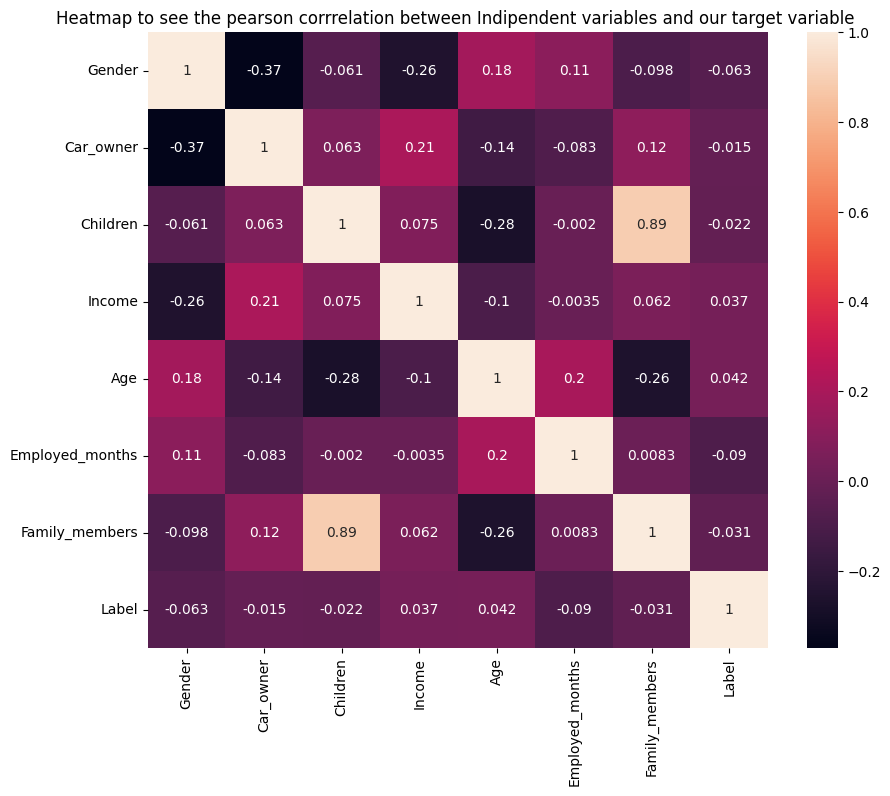

In [ ]:
## Creating heatmap to see the correlation between our target variable and all indipendent columns .
credit_corr=new_credit.corr(method='pearson') ## Creating a correlation between all numeric columns .
plt.figure(figsize=(10,8))
sns.heatmap(credit_corr,annot=True) ## heatmap will visually show the correlation value between all the columns .
plt.title("Heatmap to see the pearson corrrelation between Indipendent variables and our target variable ")
plt.show()

In [ ]:
X=new_credit.drop(['Label'],axis=1) ## Creating X dataset for all the indipendent columns.
y=new_credit['Label'] ## y is our target variable .

In [ ]:
## train_test_split will split the dataset into training and testing .
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) ## test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .

In [ ]:
print(X_train.shape) ## shape function will show total no of rows and columns .
print(y_test.shape) ## shape function will show total no of rows and columns .

(1083, 7)
(465,)


In [ ]:
from sklearn.preprocessing import StandardScaler ## Importing Standardscaler to reduce the skewness in dataset .
SC=StandardScaler()
SC_Xtrain=SC.fit_transform(X_train) ## Fitting and transforming the X train data with Standardscaler .
SC_Xtrain

array([[ 0.76224792, -0.79746577, -0.51926542, ..., -0.34309349,
        -0.55283327, -1.19339887],
       [-1.31190912, -0.79746577,  0.70326599, ..., -0.25608196,
         1.87578872,  0.8435609 ],
       [ 0.76224792, -0.79746577,  0.70326599, ..., -1.3872319 ,
        -0.73662088,  0.8435609 ],
       ...,
       [-1.31190912,  1.25397231,  1.92579741, ..., -0.69113963,
        -1.03855767,  1.86204079],
       [ 0.76224792, -0.79746577, -0.51926542, ...,  0.52702184,
         0.54989239, -0.17491898],
       [ 0.76224792,  1.25397231, -0.51926542, ..., -1.3872319 ,
        -0.9072808 , -0.17491898]])

In [ ]:
SC_Xtest=SC.transform(X_test) ## Only transforming the X_test data with Standardscaler .
SC_Xtest

array([[ 0.76224792, -0.79746577, -0.51926542, ..., -0.95217423,
         0.95685067, -0.17491898],
       [ 0.76224792, -0.79746577, -0.51926542, ...,  1.39713718,
        -0.29028335, -1.19339887],
       [ 0.76224792, -0.79746577,  1.92579741, ..., -0.16907043,
        -0.10649193,  0.8435609 ],
       ...,
       [ 0.76224792, -0.79746577, -0.51926542, ...,  0.87506798,
         0.02341491, -0.17491898],
       [-1.31190912, -0.79746577, -0.51926542, ...,  0.78805645,
        -0.97291923, -1.19339887],
       [-1.31190912, -0.79746577, -0.51926542, ..., -0.25608196,
        -0.39530103, -0.17491898]])

In this project i have used 7 different ML algorithms to correctly predict approved applications and rejected ones . I have also tuned some of the algorithms to make it more robust and accurate.

Below i have mentioned all the algorithms and where i have used Hyperparameter tuning.

# ML algorithms :

1. Logistic Regression

2. DecisionTreeClassifier (Hyperparameter tuning)

3. RandomForestClassifier (Hyperparameter tuning)

4. KNearestNeighbors

5. xgboost (Hyperparameter tuning)

6. svm or support vector machine (Hyperparameter tuning)

7. Naive bayes or GaussianNB

In the end i have compared all the algorithms and commented on which will be best for which purpose .

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,classification_report

**Evaluation metrics in classification model :**

1. accuracy_score : accuracy score is basically the ratio between Total_no_of_correct_predictions/Total no of datapoints .

2. confusion_matrix : confusion matrix not only shows total no of correct or wrong prediction but it also shows the number of True Positive , False Positive , True Negative and False Negative .

3. f1_score : This is a metric which is a harmonic mean between precision and recall.

4. classification report : classification_report shows avg_accuracy , avg f1_score , precision and recall score .

In [ ]:
from sklearn.linear_model import LogisticRegression ## Importing LogisticRegression ML algorithm .
LR=LogisticRegression()
LR.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
LR_pred=LR.predict(SC_Xtest) ## Pedicting the model with X_test .
LR_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of LogisticRegression Algorithm for this dataset is :", accuracy_score(LR_pred,y_test))
print("f1 score of LogisticRegression Algorithm for this dataset is :", f1_score(LR_pred,y_test))

Accuracy score of LogisticRegression Algorithm for this dataset is : 0.9075268817204301
f1 score of LogisticRegression Algorithm for this dataset is : 0.0


In [ ]:
print("The confusion matrix for this algorithm :\n", confusion_matrix(y_test,LR_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,LR_pred))

The confusion matrix for this algorithm :
 [[422   0]
 [ 43   0]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.tree import DecisionTreeClassifier ## Importing DecisionTreeClassifier ML algorithm .
DC=DecisionTreeClassifier()
DC.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
DC_pred=DC.predict(SC_Xtest) ## Pedicting the model with X_test .
DC_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of DecisionTree Algorithm for this dataset is :", accuracy_score(DC_pred,y_test))
print("f1 score of DecisionTree Algorithm for this dataset is :", f1_score(DC_pred,y_test))
print("roc_auc_score of DecisionTree Algorithm for this dataset is :", roc_auc_score(DC_pred,y_test))

Accuracy score of DecisionTree Algorithm for this dataset is : 0.8903225806451613
f1 score of DecisionTree Algorithm for this dataset is : 0.45161290322580644
roc_auc_score of DecisionTree Algorithm for this dataset is : 0.6834939759036144


In [ ]:
print("The confusion matrix for DecisionTreeClassifier algorithm :\n", confusion_matrix(y_test,DC_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,DC_pred))

The confusion matrix for DecisionTreeClassifier algorithm :
 [[393  29]
 [ 22  21]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       422
           1       0.42      0.49      0.45        43

    accuracy                           0.89       465
   macro avg       0.68      0.71      0.70       465
weighted avg       0.90      0.89      0.89       465



In [ ]:
from sklearn.model_selection import GridSearchCV ## Importing GridSearchCV for hyperparameter tuning .

In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
DC_params={'max_depth':[5,7,9,11,13,15],'min_samples_leaf':[6,8,10,12,16],
           'min_samples_split':[7,10,13,16,19],'criterion':['entropy','gini']}
DC_grid=GridSearchCV(estimator=DC,param_grid=DC_params,refit=True,verbose=1,scoring='accuracy')
DC_grid.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
DC_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 13}

In [ ]:
New_DC=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=13,criterion='entropy')
New_DC.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
New_DC_pred=New_DC.predict(SC_Xtest) ## Pedicting the model with X_test .
New_DC_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of DecisionTree Algorithm for this dataset after hyperparameter tuning :", accuracy_score(New_DC_pred,y_test))
print("f1 score of DecisionTree Algorithm for this dataset after hyperparameter tuning :", f1_score(New_DC_pred,y_test))

Accuracy score of DecisionTree Algorithm for this dataset after hyperparameter tuning : 0.9075268817204301
f1 score of DecisionTree Algorithm for this dataset after hyperparameter tuning : 0.04444444444444444


In [ ]:
print("The confusion matrix for DecisionTreeClassifier algorithm after hyperparameter tuning :\n", confusion_matrix(y_test,New_DC_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,New_DC_pred))

The confusion matrix for DecisionTreeClassifier algorithm after hyperparameter tuning :
 [[421   1]
 [ 42   1]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.50      0.02      0.04        43

    accuracy                           0.91       465
   macro avg       0.70      0.51      0.50       465
weighted avg       0.87      0.91      0.87       465



In [ ]:
from sklearn.ensemble import RandomForestClassifier ## Importing RandomForestClassifier ML algorithm .
RF=RandomForestClassifier()
RF.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
RF_pred=RF.predict(SC_Xtest) ## Pedicting the model with X_test .
RF_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of RandomForestClassifier Algorithm for this dataset is :", accuracy_score(RF_pred,y_test))
print("f1 score of RandomForestClassifier Algorithm for this dataset is :", f1_score(RF_pred,y_test))
print("roc_auc_score of RandomForestClassifier Algorithm for this dataset is :", roc_auc_score(RF_pred,y_test))

Accuracy score of RandomForestClassifier Algorithm for this dataset is : 0.946236559139785
f1 score of RandomForestClassifier Algorithm for this dataset is : 0.6268656716417911
roc_auc_score of RandomForestClassifier Algorithm for this dataset is : 0.9125566893424036


In [ ]:
print("The confusion matrix for RandomForest Classifier algorithm :\n", confusion_matrix(y_test,RF_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,RF_pred))

The confusion matrix for RandomForest Classifier algorithm :
 [[419   3]
 [ 22  21]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       422
           1       0.88      0.49      0.63        43

    accuracy                           0.95       465
   macro avg       0.91      0.74      0.80       465
weighted avg       0.94      0.95      0.94       465



In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
RF_params={'n_estimators':[8,12,15,19,22,26,30,35,40,45]}
RF_grid=GridSearchCV(estimator=RF,param_grid=RF_params,scoring="accuracy",refit=True,verbose=1)
RF_grid.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
RF_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 26}

In [ ]:
New_RF=RandomForestClassifier(n_estimators=26,max_depth=5,min_samples_leaf=10,min_samples_split=13,criterion='entropy')
New_RF.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
New_RF_pred=New_RF.predict(SC_Xtest) ## Pedicting the model with X_test .
New_RF_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of RandomForest Classifier Algorithm for this dataset after hyperparameter tuning :", accuracy_score(New_RF_pred,y_test))
print("f1 score of RandomForest Classifier Algorithm for this dataset after hyperparameter tuning :", f1_score(New_RF_pred,y_test))

Accuracy score of RandomForest Classifier Algorithm for this dataset after hyperparameter tuning : 0.9075268817204301
f1 score of RandomForest Classifier Algorithm for this dataset after hyperparameter tuning : 0.0


In [ ]:
print("The confusion matrix for RandomForest Classifier algorithm after hyperparameter tuning :\n", confusion_matrix(y_test,New_RF_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,New_RF_pred))

The confusion matrix for RandomForest Classifier algorithm after hyperparameter tuning :
 [[422   0]
 [ 43   0]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier ## Importing KNeighborsClassifier ML algorithm .
KNN=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
KNN.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
KNN_pred=KNN.predict(SC_Xtest) ## Pedicting the model with X_test .
KNN_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of KneighborsClassifier Algorithm for this dataset is :", accuracy_score(KNN_pred,y_test))
print("f1 score of KneighborsClassifier Algorithm for this dataset is :", f1_score(KNN_pred,y_test))
print("roc_auc_score of KneighborsClassifier Algorithm for this dataset is :", roc_auc_score(KNN_pred,y_test))

Accuracy score of KneighborsClassifier Algorithm for this dataset is : 0.8817204301075269
f1 score of KneighborsClassifier Algorithm for this dataset is : 0.06779661016949153
roc_auc_score of KneighborsClassifier Algorithm for this dataset is : 0.5168429844097996


In [ ]:
print("The confusion matrix for KneighborsClassifier algorithm :\n", confusion_matrix(y_test,KNN_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,KNN_pred))

The confusion matrix for KneighborsClassifier algorithm :
 [[408  14]
 [ 41   2]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       422
           1       0.12      0.05      0.07        43

    accuracy                           0.88       465
   macro avg       0.52      0.51      0.50       465
weighted avg       0.84      0.88      0.86       465



In [ ]:
import xgboost as XGB ## Importing XGBoost or XGBClassifier ML algorithm .
Xgb_model=XGB.XGBClassifier()
Xgb_model.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
Xgb_pred=Xgb_model.predict(SC_Xtest) ## Pedicting the model with X_test .
Xgb_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of xgboost Algorithm for this dataset is :", accuracy_score(Xgb_pred,y_test))
print("f1 score of xgboost Algorithm for this dataset is :", f1_score(Xgb_pred,y_test))
print("roc_auc_score of xgboost Algorithm for this dataset is :", roc_auc_score(Xgb_pred,y_test))

Accuracy score of xgboost Algorithm for this dataset is : 0.9182795698924732
f1 score of xgboost Algorithm for this dataset is : 0.525
roc_auc_score of xgboost Algorithm for this dataset is : 0.7580828492043445


In [ ]:
print("The confusion matrix for xgboostClassifier algorithm :\n", confusion_matrix(y_test,Xgb_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,Xgb_pred))

The confusion matrix for xgboostClassifier algorithm :
 [[406  16]
 [ 22  21]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       422
           1       0.57      0.49      0.53        43

    accuracy                           0.92       465
   macro avg       0.76      0.73      0.74       465
weighted avg       0.91      0.92      0.92       465



In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
Xgb_params={'gamma':[0.001,0.01,0.1,1,10],'learning_rate':[0.001,0.01,0.1,1,10]}
Xgb_grid=GridSearchCV(estimator=Xgb_model,param_grid=Xgb_params,scoring='accuracy',verbose=1,refit=True)
Xgb_grid.fit(SC_Xtrain,y_train) ## fitting the model for hyperparameter tuning .
Xgb_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'gamma': 0.01, 'learning_rate': 0.1}

In [ ]:
New_Xgb=XGB.XGBClassifier(gamma=0.01,learning_rate=0.1)
New_Xgb.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
New_Xgb_pred=New_Xgb.predict(SC_Xtest) ## Pedicting the model with X_test .
New_Xgb_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of xgboost Algorithm for this dataset after hyperparameter tuning :", accuracy_score(New_Xgb_pred,y_test))
print("f1 score of xgboost Algorithm for this dataset after hyperparameter tuning :", f1_score(New_Xgb_pred,y_test))
print("roc_auc_score of xgboost Algorithm for this dataset after hyperparameter tuning :", roc_auc_score(New_Xgb_pred,y_test))

Accuracy score of xgboost Algorithm for this dataset after hyperparameter tuning : 0.9118279569892473
f1 score of xgboost Algorithm for this dataset after hyperparameter tuning : 0.3880597014925373
roc_auc_score of xgboost Algorithm for this dataset after hyperparameter tuning : 0.7368197278911565


In [ ]:
print("The confusion matrix for xgboostClassifier algorithm after hyperparameter tuning :\n", confusion_matrix(y_test,New_Xgb_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,New_Xgb_pred))

The confusion matrix for xgboostClassifier algorithm after hyperparameter tuning :
 [[411  11]
 [ 30  13]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       422
           1       0.54      0.30      0.39        43

    accuracy                           0.91       465
   macro avg       0.74      0.64      0.67       465
weighted avg       0.90      0.91      0.90       465



In [ ]:
from sklearn import svm ## Importing svm or support vector machine ML algorithm .
svm_model=svm.SVC(kernel='sigmoid')
svm_model.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
svm_pred=svm_model.predict(SC_Xtest) ## Pedicting the model with X_test .
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of svm Algorithm for this dataset is :", accuracy_score(svm_pred,y_test))
print("f1 score of svm Algorithm for this dataset is :", f1_score(svm_pred,y_test))
print("roc_auc_score of svm Algorithm for this dataset is :", roc_auc_score(svm_pred,y_test))

Accuracy score of svm Algorithm for this dataset is : 0.8451612903225807
f1 score of svm Algorithm for this dataset is : 0.14285714285714285
roc_auc_score of svm Algorithm for this dataset is : 0.5295386562356189


In [ ]:
print("The confusion matrix for svm algorithm :\n", confusion_matrix(y_test,svm_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,svm_pred))

The confusion matrix for svm algorithm :
 [[387  35]
 [ 37   6]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       422
           1       0.15      0.14      0.14        43

    accuracy                           0.85       465
   macro avg       0.53      0.53      0.53       465
weighted avg       0.84      0.85      0.84       465



In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
svm_params={'kernel':['poly','sigmoid'],'C':[0.01,0.1,1,10]}
svm_grid=GridSearchCV(estimator=svm_model,param_grid=svm_params,scoring='accuracy',verbose=1,refit=True)
svm_grid.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
svm_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 0.01, 'kernel': 'poly'}

In [ ]:
svm_new=svm.SVC(kernel='poly',C=0.01)
svm_new.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
new_svm_pred=svm_model.predict(SC_Xtest) ## Pedicting the model with X_test .
new_svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of svm Algorithm for this dataset after hyperparameter tuning :", accuracy_score(new_svm_pred,y_test))
print("f1 score of svm Algorithm for this dataset after hyperparameter tuning :", f1_score(new_svm_pred,y_test))
print("roc_auc_score of svm Algorithm for this dataset after hyperparameter tuning :", roc_auc_score(new_svm_pred,y_test))

Accuracy score of svm Algorithm for this dataset after hyperparameter tuning : 0.8451612903225807
f1 score of svm Algorithm for this dataset after hyperparameter tuning : 0.14285714285714285
roc_auc_score of svm Algorithm for this dataset after hyperparameter tuning : 0.5295386562356189


In [ ]:
print("The confusion matrix for svm algorithm after hyperparameter tuning :\n", confusion_matrix(y_test,new_svm_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,new_svm_pred))

The confusion matrix for svm algorithm after hyperparameter tuning :
 [[387  35]
 [ 37   6]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       422
           1       0.15      0.14      0.14        43

    accuracy                           0.85       465
   macro avg       0.53      0.53      0.53       465
weighted avg       0.84      0.85      0.84       465



In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB ## Importing NaiveBayes or GaussianNB ML algorithm .
GNB_model=GNB()
GNB_model.fit(SC_Xtrain,y_train) ## Fitting the data into the model .
GNB_pred=GNB_model.predict(SC_Xtest) ## Pedicting the model with X_test .
GNB_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("Accuracy score of NaiveBayes or GaussianNB Algorithm for this dataset is :", accuracy_score(GNB_pred,y_test))
print("f1 score of NaiveBayes or GaussianNB Algorithm for this dataset is :", f1_score(GNB_pred,y_test))

Accuracy score of NaiveBayes or GaussianNB Algorithm for this dataset is : 0.9075268817204301
f1 score of NaiveBayes or GaussianNB Algorithm for this dataset is : 0.04444444444444444


In [ ]:
print("The confusion matrix for NaiveBayes or GaussianNB algorithm :\n", confusion_matrix(y_test,GNB_pred))
print("-------------------------------------------")
print("The classification report is below :\n", classification_report(y_test,GNB_pred))

The confusion matrix for NaiveBayes or GaussianNB algorithm :
 [[421   1]
 [ 42   1]]
-------------------------------------------
The classification report is below :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.50      0.02      0.04        43

    accuracy                           0.91       465
   macro avg       0.70      0.51      0.50       465
weighted avg       0.87      0.91      0.87       465



**Accuracy_score** Comparison :

1. Accuracy score of NaiveBayes or GaussianNB Algorithm for this dataset is : 90.75

2. Accuracy score of svm Algorithm for this dataset is : 84.51

3. Accuracy score of xgboost Algorithm for this dataset after hyperparameter tuning : 91.18

4. Accuracy score of xgboost Algorithm for this dataset is : 91.82

5. Accuracy score of KneighborsClassifier Algorithm for this dataset is : 88.17

6. Accuracy score of RandomForest Classifier Algorithm for this dataset after hyperparameter tuning : 90.75

7. Accuracy score of RandomForestClassifier Algorithm for this dataset is : 94.62

8. Accuracy score of DecisionTree Algorithm for this dataset after hyperparameter tuning : 90.75

9. Accuracy score of DecisionTree Algorithm for this dataset is : 89.03

10. Accuracy score of LogisticRegression Algorithm for this dataset is : 90.75

**Highest accuracy_score :**

If the goal is to select the best ML algorithm purely based on accuracy_score then RandomForest without hyperparameter tuning gives us the best accuracy score of 94.62 % followed by Xgboost algorithm (91.82 %) .

**Predict Approved applications :**

If our goal is to predict the approved applications accurately then RandomForestClassifier algorithm after hyperparameter tuning gives 100 % accuracy . In testing set we have 422 datapoints for approval . It predicts all 422 correctly so it gives 100 % accuracy .

But it has a drawback that it cannot predict one single rejection correctly and it has 0 % accuracy in terms of predicting the rejected application .

**Predict Rejected applications :**

If the goal is to predict the rejected applications accurately then RandomForestClassifier , xgboost and DecisionTree algorithm gives us the best results . all three gives us a recall score of 49 % for predicting the rejected applications .

In testing set we have 43 datapoints for rejected applications . Out of 43 all of them has correctly predicted 21 and 22 has been misclassified .

**Most balanced algorithm :**

RandomForestClassifier without any hyperparameter tuning gives us a accuracy of 94.62 % .
In predicting the approved applications it has correctly predicted 419 and misclassified 3 out of 422 datapoints . it has maintain a recall score of 99.28 % .

Out of 43 datapoints for rejected applications it has predicted 21 correctly which gives a healthy recall score of 49% .
This RandomForest also has a higher f1_score of 62.68 % which is higher than all other algorithm .

**Conclusion :**

This project has soo many different aspects which can be helpful for any financial orgainizations who deals with credit or debit cards .

Different algorithm might be helpful in different ways . It has algorithm for predicting the approvals , rejections or to predict both. Many data analysis characteristics will also serves as a bonus if they use this model .